In [1]:
from utils_v2 import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# BETO uncased

## EXP 1

In [2]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

In [13]:
# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Epoch:  10%|█         | 1/10 [04:30<40:31, 270.19s/it]

{'accuracy': 0.5923696776760844, 'balanced_accuracy': 0.24863334195461426}


Epoch:  20%|██        | 2/10 [09:01<36:05, 270.65s/it]

{'accuracy': 0.8131715081575805, 'balanced_accuracy': 0.5702393321168863}


Epoch:  30%|███       | 3/10 [13:33<31:37, 271.05s/it]

{'accuracy': 0.9155889375248707, 'balanced_accuracy': 0.794900017927525}


Epoch:  40%|████      | 4/10 [18:04<27:04, 270.79s/it]

{'accuracy': 0.9664743334659769, 'balanced_accuracy': 0.9209764577651339}


Epoch:  50%|█████     | 5/10 [22:34<22:33, 270.65s/it]

{'accuracy': 0.9809490648627139, 'balanced_accuracy': 0.9577056713088901}


Epoch:  60%|██████    | 6/10 [27:04<18:01, 270.50s/it]

{'accuracy': 0.9913450059689614, 'balanced_accuracy': 0.9793419215836855}


Epoch:  70%|███████   | 7/10 [31:34<13:30, 270.25s/it]

{'accuracy': 0.9959212097095106, 'balanced_accuracy': 0.9872492421835716}


Epoch:  80%|████████  | 8/10 [36:03<08:59, 269.91s/it]

{'accuracy': 0.9982093115797851, 'balanced_accuracy': 0.9969415632174261}


Epoch:  90%|█████████ | 9/10 [40:32<04:29, 269.63s/it]

{'accuracy': 0.9989056904098687, 'balanced_accuracy': 0.9980626400857876}


Epoch: 100%|██████████| 10/10 [45:01<00:00, 270.12s/it]

{'accuracy': 0.9991046557898926, 'balanced_accuracy': 0.9987559415763172}


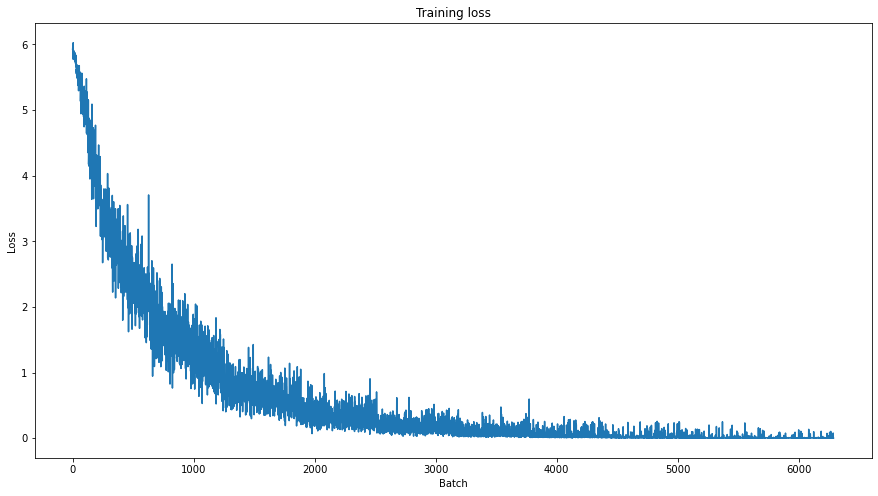

In [18]:
# Entrenamiento
epochs = 10
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
input_filename = '../test_santander.csv'
output_filename = './results.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## EXP 2

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5588440111420613, 'balanced_accuracy': 0.20986319713396953}


Epoch:  20%|██        | 2/10 [09:01<36:02, 270.37s/it]

{'accuracy': 0.7962097095105451, 'balanced_accuracy': 0.5000325707955752}


Epoch:  30%|███       | 3/10 [13:33<31:35, 270.84s/it]

{'accuracy': 0.9112116991643454, 'balanced_accuracy': 0.7304510149067912}


Epoch:  40%|████      | 4/10 [18:05<27:07, 271.18s/it]

{'accuracy': 0.9683147632311978, 'balanced_accuracy': 0.8884181914411258}


Epoch:  50%|█████     | 5/10 [22:37<22:37, 271.44s/it]

{'accuracy': 0.9851770791882213, 'balanced_accuracy': 0.9445011390548981}


Epoch:  60%|██████    | 6/10 [27:09<18:06, 271.67s/it]

{'accuracy': 0.9938320732192598, 'balanced_accuracy': 0.9757304783375494}


Epoch:  70%|███████   | 7/10 [31:41<13:35, 271.75s/it]

{'accuracy': 0.9972642260246717, 'balanced_accuracy': 0.9885140659721146}


Epoch:  80%|████████  | 8/10 [36:13<09:03, 271.72s/it]

{'accuracy': 0.9986569836848388, 'balanced_accuracy': 0.9946999516321139}


Epoch:  90%|█████████ | 9/10 [40:44<04:31, 271.61s/it]

{'accuracy': 0.9992041384799045, 'balanced_accuracy': 0.9960759921572692}


Epoch: 100%|██████████| 10/10 [45:15<00:00, 271.57s/it]

{'accuracy': 0.9993036211699164, 'balanced_accuracy': 0.9961362747230733}


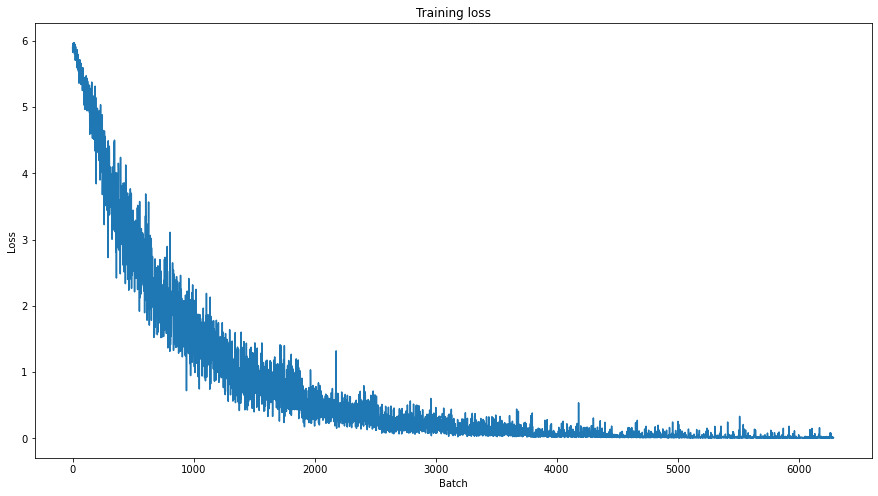

In [2]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 5e-5
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp2_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## Exp 3

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:   7%|▋         | 1/15 [04:31<1:03:27, 272.00s/it]

{'accuracy': 0.5790887385594906, 'balanced_accuracy': 0.22443701174464123}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  13%|█▎        | 2/15 [09:07<59:11, 273.16s/it]  

{'accuracy': 0.7878531635495424, 'balanced_accuracy': 0.5485495586064842}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  20%|██        | 3/15 [13:44<54:49, 274.08s/it]

{'accuracy': 0.9036012733784321, 'balanced_accuracy': 0.7760230972553918}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  27%|██▋       | 4/15 [18:20<50:21, 274.72s/it]

{'accuracy': 0.9473736569836848, 'balanced_accuracy': 0.8868788923204899}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  33%|███▎      | 5/15 [22:56<45:50, 275.02s/it]

{'accuracy': 0.9714982093115798, 'balanced_accuracy': 0.9373372142663835}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  40%|████      | 6/15 [27:33<41:21, 275.72s/it]

{'accuracy': 0.9811977715877437, 'balanced_accuracy': 0.9527488680279261}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  47%|████▋     | 7/15 [32:10<36:48, 276.00s/it]

{'accuracy': 0.9898527656187823, 'balanced_accuracy': 0.9771337915134256}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  53%|█████▎    | 8/15 [36:45<32:11, 275.98s/it]

{'accuracy': 0.9937325905292479, 'balanced_accuracy': 0.9879070057896164}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  60%|██████    | 9/15 [41:22<27:36, 276.06s/it]

{'accuracy': 0.9950756068444091, 'balanced_accuracy': 0.9904528879986547}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  67%|██████▋   | 10/15 [45:58<23:00, 276.05s/it]

{'accuracy': 0.9966673298846, 'balanced_accuracy': 0.9943151765312194}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  73%|███████▎  | 11/15 [50:33<18:23, 275.92s/it]

{'accuracy': 0.9987067250298448, 'balanced_accuracy': 0.9948797785701745}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  80%|████████  | 12/15 [55:10<13:48, 276.06s/it]

{'accuracy': 0.9985575009948269, 'balanced_accuracy': 0.9953143212824006}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  87%|████████▋ | 13/15 [59:46<09:12, 276.22s/it]

{'accuracy': 0.9992538798249104, 'balanced_accuracy': 0.9986239070341708}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch:  93%|█████████▎| 14/15 [1:04:22<04:36, 276.12s/it]

{'accuracy': 0.9993036211699164, 'balanced_accuracy': 0.9985949485546761}
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


Epoch: 100%|██████████| 15/15 [1:08:57<00:00, 275.83s/it]

{'accuracy': 0.9993036211699164, 'balanced_accuracy': 0.9984433090306538}


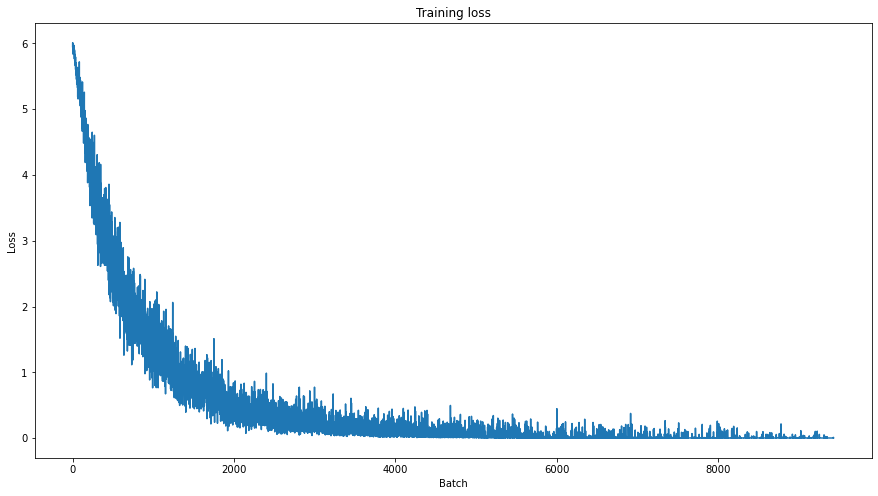

In [2]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 15
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp3_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## Exp 4

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

Epoch:  10%|█         | 1/10 [04:37<41:37, 277.53s/it]

{'accuracy': 0.5826203740549144, 'balanced_accuracy': 0.2382139997938819}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  20%|██        | 2/10 [09:14<36:59, 277.50s/it]

{'accuracy': 0.8022781536012734, 'balanced_accuracy': 0.5422051795730303}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  30%|███       | 3/10 [13:52<32:22, 277.45s/it]

{'accuracy': 0.9205630720254676, 'balanced_accuracy': 0.7988256303132725}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  40%|████      | 4/10 [18:29<27:44, 277.49s/it]

{'accuracy': 0.9562276163947473, 'balanced_accuracy': 0.8885308491031652}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  50%|█████     | 5/10 [23:07<23:07, 277.40s/it]

{'accuracy': 0.9821925984878631, 'balanced_accuracy': 0.9596999602483837}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  60%|██████    | 6/10 [27:44<18:29, 277.33s/it]

{'accuracy': 0.9906983684838838, 'balanced_accuracy': 0.9790974266985496}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  70%|███████   | 7/10 [32:20<13:51, 277.08s/it]

{'accuracy': 0.9963688818145643, 'balanced_accuracy': 0.9878387762765947}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  80%|████████  | 8/10 [36:57<09:14, 277.06s/it]

{'accuracy': 0.9981595702347792, 'balanced_accuracy': 0.9944628373312365}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  90%|█████████ | 9/10 [41:33<04:36, 276.68s/it]

{'accuracy': 0.9990549144448866, 'balanced_accuracy': 0.9957387615088074}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch: 100%|██████████| 10/10 [46:09<00:00, 276.92s/it]

{'accuracy': 0.9991543971348985, 'balanced_accuracy': 0.9958244689855651}


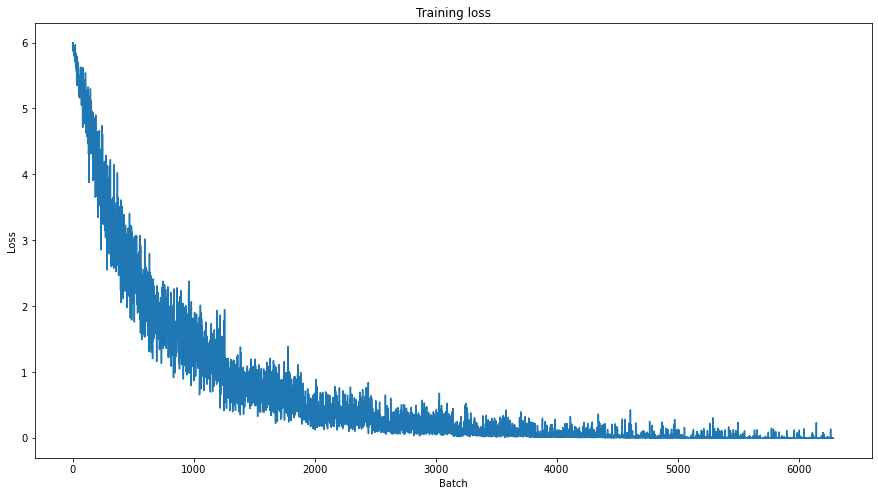

In [3]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
idx2name = {idx:name for name, idx in name2idx.items()}
df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp4_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

In [14]:
# Cargamos el dataset:
df = pd.read_csv('./results_exp4_cased.csv',sep = ',',header=None)
df.iloc[:,1] = [idx2name[idx] for idx in df.iloc[:,1]] 
df.to_csv('./results_exp4_cased.csv',header=False,index=False)

## Exp 5

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

Epoch:   5%|▌         | 1/20 [04:34<1:26:58, 274.68s/it]

{'accuracy': 0.4747313967369678, 'balanced_accuracy': 0.1614004035035819}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  10%|█         | 2/20 [09:11<1:22:36, 275.38s/it]

{'accuracy': 0.2742240350179069, 'balanced_accuracy': 0.0756024703381889}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  15%|█▌        | 3/20 [13:48<1:18:10, 275.91s/it]

{'accuracy': 0.021339037007560683, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  20%|██        | 4/20 [18:25<1:13:39, 276.20s/it]

{'accuracy': 0.0245224830879427, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488

Epoch:  25%|██▌       | 5/20 [23:02<1:09:05, 276.38s/it]

{'accuracy': 0.01770791882212495, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
48

Epoch:  30%|███       | 6/20 [27:37<1:04:24, 276.05s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  35%|███▌      | 7/20 [32:12<59:43, 275.68s/it]  

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  40%|████      | 8/20 [36:47<55:04, 275.38s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  45%|████▌     | 9/20 [41:21<50:26, 275.17s/it]

{'accuracy': 0.028203342618384402, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  50%|█████     | 10/20 [45:56<45:50, 275.08s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  55%|█████▌    | 11/20 [50:31<41:14, 275.00s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  60%|██████    | 12/20 [55:05<36:38, 274.80s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  65%|██████▌   | 13/20 [59:39<32:01, 274.48s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  70%|███████   | 14/20 [1:04:14<27:26, 274.49s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  75%|███████▌  | 15/20 [1:08:48<22:51, 274.27s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  80%|████████  | 16/20 [1:13:22<18:17, 274.33s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  85%|████████▌ | 17/20 [1:17:56<13:42, 274.16s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  90%|█████████ | 18/20 [1:22:30<09:08, 274.34s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  95%|█████████▌| 19/20 [1:27:05<04:34, 274.40s/it]

{'accuracy': 0.022881018702745722, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch: 100%|██████████| 20/20 [1:31:40<00:00, 275.02s/it]

{'accuracy': 0.024273776362912853, 'balanced_accuracy': 0.002840909090909091}


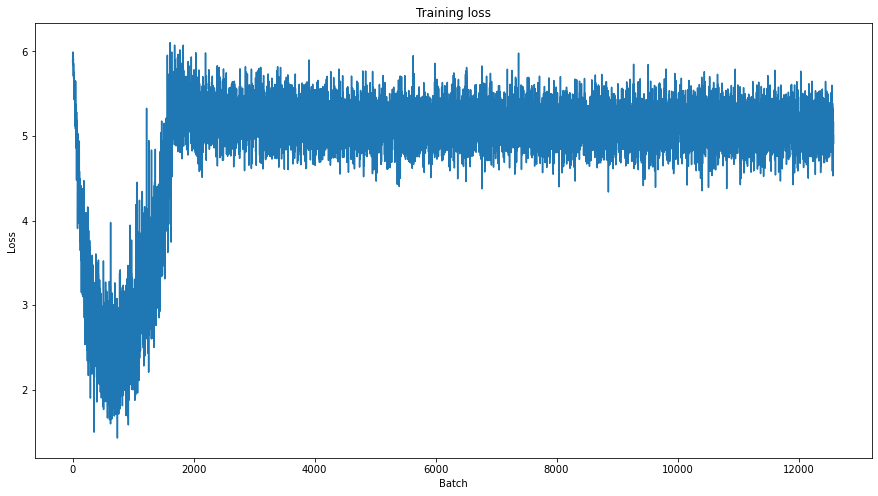

In [6]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
idx2name = {idx:name for name, idx in name2idx.items()}
df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 20
lr = 5e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp5_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## Exp 6

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

Epoch:  10%|█         | 1/10 [04:33<41:04, 273.88s/it]

{'accuracy': 0.02158774373259053, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
48

Epoch:  20%|██        | 2/10 [09:08<36:32, 274.08s/it]

{'accuracy': 0.023726621567847196, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  30%|███       | 3/10 [13:42<31:58, 274.14s/it]

{'accuracy': 0.028203342618384402, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  40%|████      | 4/10 [18:17<27:26, 274.38s/it]

{'accuracy': 0.029844807003581376, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  50%|█████     | 5/10 [22:52<22:52, 274.53s/it]

{'accuracy': 0.0245224830879427, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488

Epoch:  60%|██████    | 6/10 [27:27<18:18, 274.70s/it]

{'accuracy': 0.023726621567847196, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  70%|███████   | 7/10 [32:02<13:44, 274.69s/it]

{'accuracy': 0.029844807003581376, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  80%|████████  | 8/10 [36:37<09:09, 274.71s/it]

{'accuracy': 0.029844807003581376, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch:  90%|█████████ | 9/10 [41:11<04:34, 274.78s/it]

{'accuracy': 0.029844807003581376, 'balanced_accuracy': 0.002840909090909091}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
4

Epoch: 100%|██████████| 10/10 [45:45<00:00, 274.59s/it]

{'accuracy': 0.029844807003581376, 'balanced_accuracy': 0.002840909090909091}


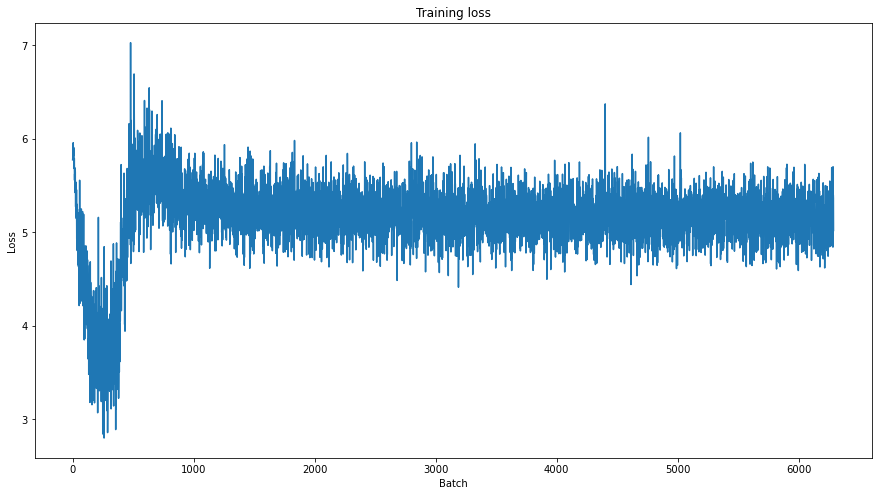

In [7]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
idx2name = {idx:name for name, idx in name2idx.items()}
df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 5e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp6_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## Exp 7

In [ ]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
# name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
# idx2name = {idx:name for name, idx in name2idx.items()}
# df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 5e-5
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp7_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

## Exp 8

In [ ]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
# name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
# idx2name = {idx:name for name, idx in name2idx.items()}
# df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-uncased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-uncased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 7e-5
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp8_uncased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-uncased',
                 max_len=128,
                 batch_size=32)

# Beto Cased

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased a

{'accuracy': 0.6301233585356149, 'balanced_accuracy': 0.2967587784291158}


Epoch:  20%|██        | 2/10 [09:00<36:01, 270.22s/it]

{'accuracy': 0.8519697572622363, 'balanced_accuracy': 0.6536631461066229}


Epoch:  30%|███       | 3/10 [13:31<31:32, 270.43s/it]

{'accuracy': 0.9264325507361719, 'balanced_accuracy': 0.8168445282695622}


Epoch:  40%|████      | 4/10 [18:02<27:03, 270.55s/it]

{'accuracy': 0.9685137286112216, 'balanced_accuracy': 0.9219156773883906}


Epoch:  50%|█████     | 5/10 [22:33<22:33, 270.61s/it]

{'accuracy': 0.9848786311181854, 'balanced_accuracy': 0.9661056466168451}


Epoch:  60%|██████    | 6/10 [27:03<18:02, 270.56s/it]

{'accuracy': 0.9912455232789494, 'balanced_accuracy': 0.9845155553486852}


Epoch:  70%|███████   | 7/10 [31:33<13:31, 270.36s/it]

{'accuracy': 0.996866295264624, 'balanced_accuracy': 0.9915534527367883}


Epoch:  80%|████████  | 8/10 [36:03<09:00, 270.09s/it]

{'accuracy': 0.9984082769598089, 'balanced_accuracy': 0.9945874167587637}


Epoch:  90%|█████████ | 9/10 [40:32<04:29, 269.81s/it]

{'accuracy': 0.9990051730998806, 'balanced_accuracy': 0.9986725091106834}


Epoch: 100%|██████████| 10/10 [45:01<00:00, 270.13s/it]

{'accuracy': 0.9992538798249104, 'balanced_accuracy': 0.998529647269343}


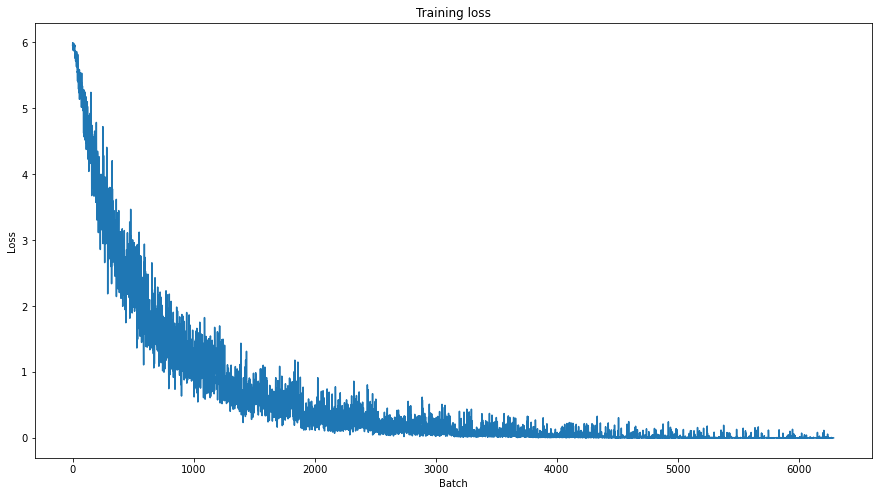

In [3]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-cased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-cased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp1_cased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-cased',
                 max_len=128,
                 batch_size=32)

## EXP 2

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased a

{'accuracy': 0.6017210505372065, 'balanced_accuracy': 0.2530921366033185}


Epoch:  20%|██        | 2/10 [09:00<35:59, 269.99s/it]

{'accuracy': 0.8258555511341027, 'balanced_accuracy': 0.552855501983796}


Epoch:  30%|███       | 3/10 [13:30<31:30, 270.10s/it]

{'accuracy': 0.9335455630720255, 'balanced_accuracy': 0.799134011248188}


Epoch:  40%|████      | 4/10 [18:00<27:01, 270.17s/it]

{'accuracy': 0.9767210505372065, 'balanced_accuracy': 0.9167549392737377}


Epoch:  50%|█████     | 5/10 [22:31<22:31, 270.24s/it]

{'accuracy': 0.9880123358535615, 'balanced_accuracy': 0.9596426108919593}


Epoch:  60%|██████    | 6/10 [27:01<18:00, 270.20s/it]

{'accuracy': 0.9945284520493434, 'balanced_accuracy': 0.9767178020686571}


Epoch:  70%|███████   | 7/10 [31:31<13:30, 270.05s/it]

{'accuracy': 0.9970652606446478, 'balanced_accuracy': 0.9886112175372752}


Epoch:  80%|████████  | 8/10 [36:00<08:59, 269.80s/it]

{'accuracy': 0.9986072423398329, 'balanced_accuracy': 0.9926496258107662}


Epoch:  90%|█████████ | 9/10 [40:29<04:29, 269.56s/it]

{'accuracy': 0.9992041384799045, 'balanced_accuracy': 0.9959522545358026}


Epoch: 100%|██████████| 10/10 [44:58<00:00, 269.82s/it]

{'accuracy': 0.9992538798249104, 'balanced_accuracy': 0.9958348117437178}


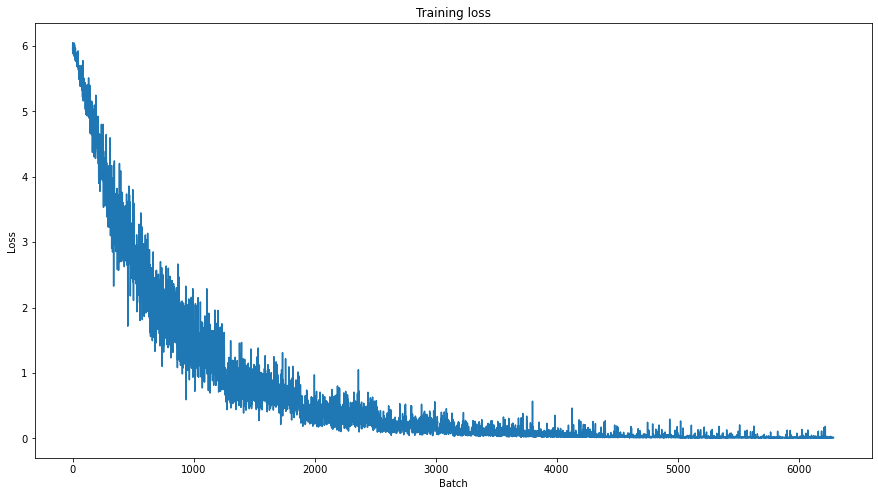

In [4]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-cased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-cased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 5e-5
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp2_cased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-cased',
                 max_len=128,
                 batch_size=32)

## Exp 3

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased a

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

Epoch:   7%|▋         | 1/15 [04:37<1:04:38, 277.05s/it]

{'accuracy': 0.6033127735773975, 'balanced_accuracy': 0.2606154185785392}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  13%|█▎        | 2/15 [09:14<1:00:03, 277.18s/it]

{'accuracy': 0.7844707520891365, 'balanced_accuracy': 0.5666337063005046}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  20%|██        | 3/15 [13:52<55:28, 277.39s/it]  

{'accuracy': 0.9185734182252288, 'balanced_accuracy': 0.8045529746743579}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  27%|██▋       | 4/15 [18:30<50:52, 277.48s/it]

{'accuracy': 0.9557799442896936, 'balanced_accuracy': 0.8886813303821868}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  33%|███▎      | 5/15 [23:07<46:13, 277.36s/it]

{'accuracy': 0.9750298448070036, 'balanced_accuracy': 0.9406906105836111}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  40%|████      | 6/15 [27:44<41:36, 277.43s/it]

{'accuracy': 0.9835356148030243, 'balanced_accuracy': 0.9704714673697701}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  47%|████▋     | 7/15 [32:21<36:56, 277.11s/it]

{'accuracy': 0.9895543175487466, 'balanced_accuracy': 0.9770053732224927}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  53%|█████▎    | 8/15 [36:57<32:18, 276.98s/it]

{'accuracy': 0.9939812972542778, 'balanced_accuracy': 0.9861754542100257}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  60%|██████    | 9/15 [41:33<27:40, 276.74s/it]

{'accuracy': 0.9958714683645046, 'balanced_accuracy': 0.9895800818042169}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  67%|██████▋   | 10/15 [46:09<23:02, 276.47s/it]

{'accuracy': 0.9978611221647433, 'balanced_accuracy': 0.9965864198866062}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  73%|███████▎  | 11/15 [50:46<18:26, 276.55s/it]

{'accuracy': 0.9989056904098687, 'balanced_accuracy': 0.9974780749872292}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  80%|████████  | 12/15 [55:22<13:49, 276.43s/it]

{'accuracy': 0.9991046557898926, 'balanced_accuracy': 0.9987067759786172}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  87%|████████▋ | 13/15 [59:58<09:12, 276.27s/it]

{'accuracy': 0.9993036211699164, 'balanced_accuracy': 0.9988586552540565}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  93%|█████████▎| 14/15 [1:04:34<04:36, 276.29s/it]

{'accuracy': 0.9993533625149223, 'balanced_accuracy': 0.9988214125952581}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch: 100%|██████████| 15/15 [1:09:10<00:00, 276.69s/it]

{'accuracy': 0.9993533625149223, 'balanced_accuracy': 0.9989704113238023}


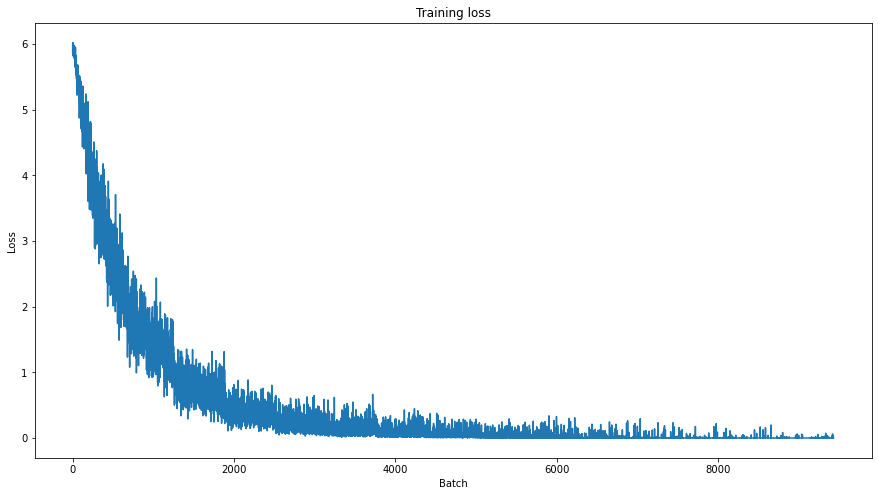

In [4]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))

# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-cased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-cased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 15
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp3_cased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-cased',
                 max_len=128,
                 batch_size=32)

## Exp 4

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased a

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

Epoch:  10%|█         | 1/10 [04:37<41:40, 277.78s/it]

{'accuracy': 0.6261937922801433, 'balanced_accuracy': 0.27728548892059823}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488


Epoch:  20%|██        | 2/10 [09:15<37:01, 277.67s/it]

{'accuracy': 0.8423199363310784, 'balanced_accuracy': 0.6360672065914312}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  30%|███       | 3/10 [13:52<32:23, 277.63s/it]

{'accuracy': 0.9348388380421807, 'balanced_accuracy': 0.8379140603657315}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  40%|████      | 4/10 [18:29<27:44, 277.46s/it]

{'accuracy': 0.9676183844011143, 'balanced_accuracy': 0.9163873413514814}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  50%|█████     | 5/10 [23:07<23:07, 277.45s/it]

{'accuracy': 0.9821428571428571, 'balanced_accuracy': 0.9570092293684744}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  60%|██████    | 6/10 [27:44<18:29, 277.47s/it]

{'accuracy': 0.9926880222841226, 'balanced_accuracy': 0.9817123697611588}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  70%|███████   | 7/10 [32:21<13:51, 277.32s/it]

{'accuracy': 0.9966673298846, 'balanced_accuracy': 0.9883164237814881}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490


Epoch:  80%|████████  | 8/10 [36:57<09:13, 276.95s/it]

{'accuracy': 0.9982093115797851, 'balanced_accuracy': 0.9948181603860924}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch:  90%|█████████ | 9/10 [41:33<04:36, 276.52s/it]

{'accuracy': 0.9991046557898926, 'balanced_accuracy': 0.9955266965752775}
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
4

Epoch: 100%|██████████| 10/10 [46:09<00:00, 276.96s/it]

{'accuracy': 0.9993036211699164, 'balanced_accuracy': 0.9984404861843007}


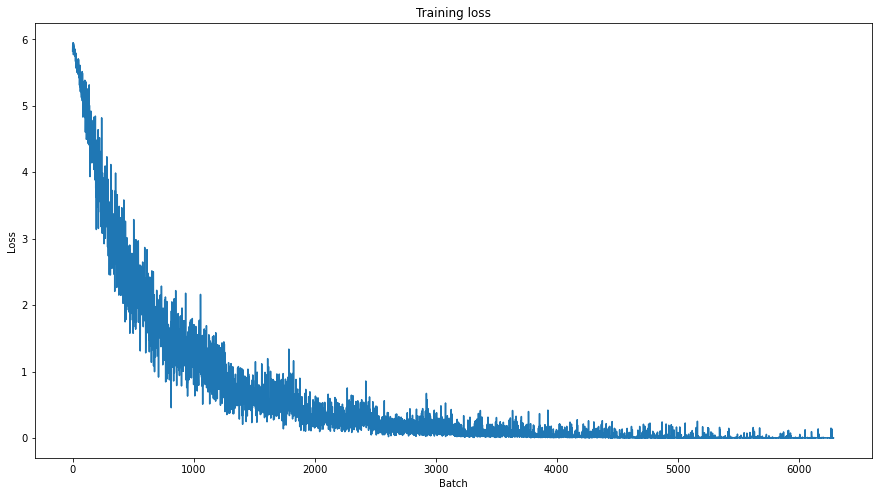

In [5]:
# Cargamos el dataset:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
name2idx = {name:idx for idx, name in enumerate(df['Intencion'].unique())}
idx2name = {idx:name for name, idx in name2idx.items()}
df['Intencion'] = [name2idx[name] for name in df.Intencion]


# Procesamos y dividimos las muestras en train y dev:
train_dataloader, validation_dataloader = tokenize_and_split(df, 
                                                             max_len=128, 
                                                             random_state=None, 
                                                             batch_size=32, 
                                                             test_size=0., 
                                                             transformer='beto-cased',
                                                             pad_token_id=0,
                                                             do_lower_case=True)

# Definimos el transformer que vamos a usar:
model, device = load_transformer(transformer='beto-cased',
                                 device='cuda:1',
                                 vocab_size=31002, 
                                 hidden_size=768, 
                                 num_hidden_layers=12, 
                                 num_attention_heads=12, 
                                 intermediate_size=3072, 
                                 hidden_act='gelu', 
                                 hidden_dropout_prob=0.1, 
                                 attention_probs_dropout_prob=0.1, 
                                 max_position_embeddings=512, 
                                 type_vocab_size=2, 
                                 initializer_range=0.02, 
                                 layer_norm_eps=1e-12, 
                                 pad_token_id=0, 
                                 gradient_checkpointing=False, 
                                 num_labels=np.max(df['Intencion'].values)+1)

# Entrenamiento
epochs = 10
lr = 1e-4
warmup_proportion = 0.1

num_training_steps =  len(train_dataloader) * epochs
num_warmup_steps = int(warmup_proportion * num_training_steps)
optimizer = AdamW(model.parameters(), weight_decay=0., lr=lr,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=num_warmup_steps, 
                                            num_training_steps=num_training_steps)

train_loss_set = train(model,train_dataloader, validation_dataloader, optimizer, scheduler, epochs, device)

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

input_filename = '../test_santander.csv'
output_filename = './results_exp4_cased.csv'
get_test_results(input_filename,
                 output_filename,
                 model,
                 device,
                 transformer='beto-cased',
                 max_len=128,
                 batch_size=32)